In [1]:
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/aimeetienle/Downloads/archive (13)/train.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
print(df.head())
print(df.describe())
print(df.info())

  policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   
3   ID00004       0.900277        0.11             0.432692           C4   
4   ID00005       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type     max_torque  \
0                4990     1       A    M1       CNG   60Nm@3500rpm   
1               27003     1       A    M1       CNG   60Nm@3500rpm   
2                4076     1       A    M1       CNG   60Nm@3500rpm   
3               21622     1      C1    M2    Petrol  113Nm@4400rpm   
4               34738     2       A    M3    Petrol   91Nm@4250rpm   

          max_power         engine_type  airbags is_esc  \
0  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
1  4

__Data Processing__

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Series([], dtype: int64)


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.dtypes

policy_id                            object
policy_tenure                       float64
age_of_car                          float64
age_of_policyholder                 float64
area_cluster                         object
population_density                    int64
make                                  int64
segment                              object
model                                object
fuel_type                            object
max_torque                           object
max_power                            object
engine_type                          object
airbags                               int64
is_esc                               object
is_adjustable_steering               object
is_tpms                              object
is_parking_sensors                   object
is_parking_camera                    object
rear_brakes_type                     object
displacement                          int64
cylinder                              int64
transmission_type               

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [9]:
df.shape

(58592, 44)

In [10]:
df.describe(include = 'all')

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
count,58592,58592.000000,58592.000000,58592.000000,58592,58592.000000,58592.000000,58592,58592,58592,58592,58592,58592,58592.000000,58592,58592,58592,58592,58592,58592,58592.000000,58592.000000,58592,58592.000000,58592,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592.000000,58592.000000
unique,58592,NaN,NaN,NaN,22,NaN,NaN,6,11,3,9,9,11,NaN,2,2,2,2,2,2,NaN,NaN,2,NaN,3,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN
top,ID00001,NaN,NaN,NaN,C8,NaN,NaN,B2,M1,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,F8D Petrol Engine,NaN,No,Yes,No,Yes,No,Drum,NaN,NaN,Manual,NaN,Power,NaN,NaN,NaN,NaN,NaN,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,NaN,NaN
freq,1,NaN,NaN,NaN,13654,NaN,NaN,18314,14948,20532,17796,17796,14948,NaN,40191,35526,44574,56219,35704,44574,NaN,NaN,38181,NaN,33502,NaN,NaN,NaN,NaN,NaN,33928,41634,41634,38077,32177,42435,42435,57383,34291,36309,42435,58229,NaN,NaN
mean,NaN,0.611246,0.069424,0.469420,NaN,18826.858667,1.763722,NaN,NaN,NaN,NaN,NaN,NaN,3.137066,NaN,NaN,NaN,NaN,NaN,NaN,1162.355851,3.626963,NaN,5.245443,NaN,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.759950,0.063968
std,NaN,0.414156,0.056721,0.122886,NaN,17660.174792,1.136988,NaN,NaN,NaN,NaN,NaN,NaN,1.832641,NaN,NaN,NaN,NaN,NaN,NaN,266.304786,0.483616,NaN,0.430353,NaN,0.228061,311.457119,112.089135,79.62227,212.423085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.389576,0.244698
min,NaN,0.002735,0.000000,0.288462,NaN,290.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,796.000000,3.000000,NaN,5.000000,NaN,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,0.210250,0.020000,0.365385,NaN,6112.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,796.000000,3.000000,NaN,5.000000,NaN,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
50%,NaN,0.573792,0.060000,0.451923,NaN,8794.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,1197.000000,4.000000,NaN,5.000000,NaN,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.000000
75%,NaN,1.039104,0.110000,0.548077,NaN,27003.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,1493.000000,4.000000,NaN,5.000000,NaN,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,0.000000


__EDA__

1. Distribution of Target Variable

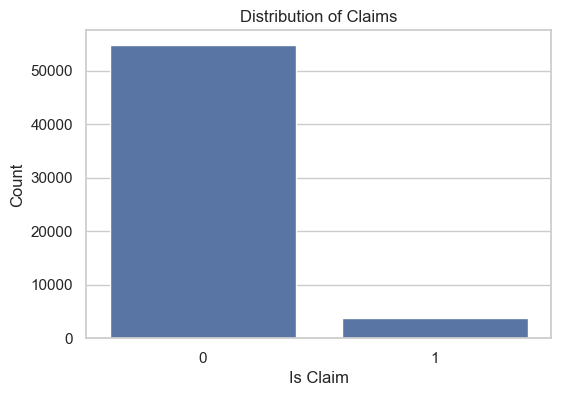

In [11]:
# Set the style for seaborn
sns.set(style='whitegrid')

# Countplot for the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='is_claim', data=df)
plt.title('Distribution of Claims')
plt.xlabel('Is Claim')
plt.ylabel('Count')
plt.show()


2. Correlation Heatmap


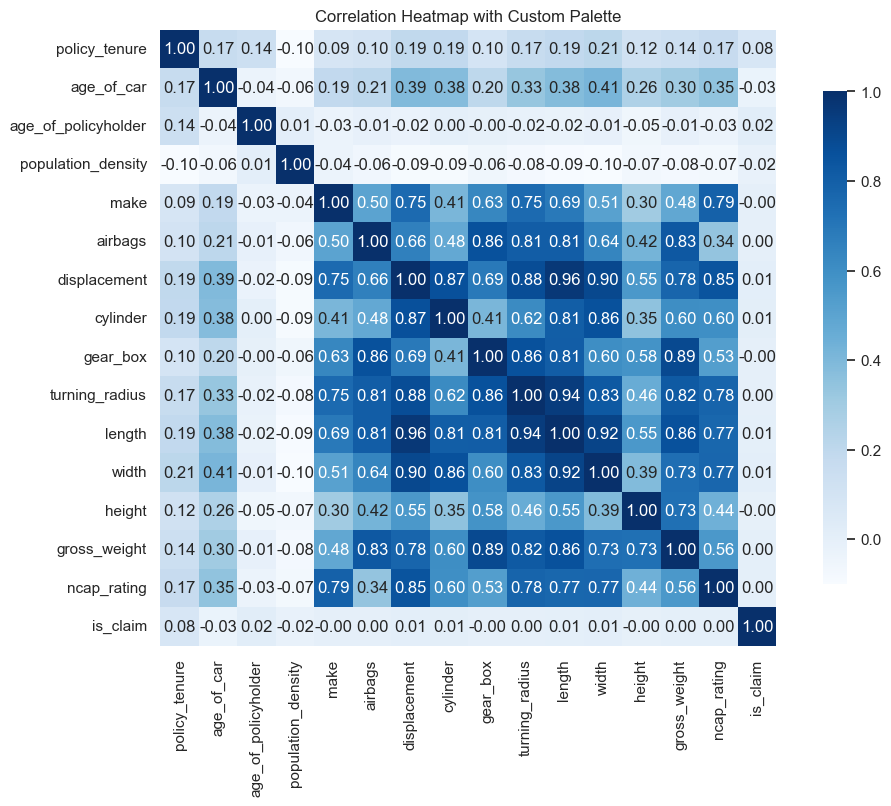

In [12]:
# Select numeric columns
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

custom_palette = ['#FF5733', '#33FF57', '#3357FF', '#FF33A1', '#A133FF']

# Set the custom palette
sns.set_palette(custom_palette)

# Create a heatmap with the custom palette
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='Blues', square=True, cbar_kws={'shrink': .8})
plt.title('Correlation Heatmap with Custom Palette')
plt.show()

The highest correlation with the target variable `is_claim`

In [13]:
# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Get the correlation values for 'is_claim' and sort them
is_claim_corr = corr_matrix['is_claim'].sort_values(ascending=False)

is_claim_corr

is_claim               1.000000
policy_tenure          0.078747
age_of_policyholder    0.022435
cylinder               0.013434
width                  0.009947
displacement           0.007678
length                 0.006495
gross_weight           0.003894
ncap_rating            0.003800
airbags                0.002789
turning_radius         0.002724
make                  -0.000456
gear_box              -0.000635
height                -0.002024
population_density    -0.017808
age_of_car            -0.028172
Name: is_claim, dtype: float64

3. Box Plots for Numerical Features


In [14]:
df_numeric.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'ncap_rating', 'is_claim'],
      dtype='object')

In [15]:
# features_to_plot = [
#     'policy_tenure', 
#     'age_of_car', 
#     'age_of_policyholder',
#     'population_density', 
#     'make', 
#     'airbags', 
#     'displacement', 
#     'cylinder',
#     'gear_box', 
#     'turning_radius', 
#     'length', 
#     'width', 
#     'height',
#     'gross_weight', 
#     'ncap_rating'
# ]
# # Create a figure with 2 rows and 8 columns
# fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(24, 8))  # Adjust figsize as needed
# axs = axs.flatten()  # Flatten the 2D array of axes to easily index it

# # Loop through each feature and create a plot in the respective subplot
# for i, col in enumerate(features_to_plot):
#     if df[col].dtype == 'object':  # Check if the column is categorical
#         sns.countplot(x='is_claim', hue=col, data=df, ax=axs[i], palette='pastel')
#         axs[i].set_title(f'Claim Status by {col.replace("_", " ").title()}')
#     else:
#         sns.boxplot(x='is_claim', y=col, data=df, ax=axs[i])
#         axs[i].set_title(f'{col.replace("_", " ").title()} vs. Claim Status')

#     axs[i].set_xlabel('Is Claim')
#     axs[i].set_ylabel(col.replace("_", " ").title())

# # Adjust layout
# plt.tight_layout()
# plt.show()

4. Count Plots for Categorical Features

In [16]:
df_cat = df.select_dtypes(include='object')


In [17]:
df_cat.columns

Index(['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')

In [18]:
# n_cols = 5  # Set number of columns for the layout
# n_rows = (len(df_cat.columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# fig, axs = plt.subplots(n_rows, n_cols, figsize=(24, 5 * n_rows))
# axs = axs.flatten()  # Flatten the array of axes for easy indexing

# # Loop through each categorical feature and create a count plot
# for i, col in enumerate(df_cat.columns):
#     sns.countplot(x='is_claim', hue=col, data=df, ax=axs[i], palette='pastel')
#     axs[i].set_title(f'Claim Status by {col.replace("_", " ").title()}')
#     axs[i].set_xlabel('Is Claim')
#     axs[i].set_ylabel('Count')

# # Hide any remaining empty subplots
# for j in range(i + 1, len(axs)):
#     axs[j].axis('off')

# # Adjust layout
# plt.tight_layout()
# plt.show()

5. Pair Plot


In [19]:
# # Select a subset of features for pair plot
# subset = df[['age_of_policyholder', 'age_of_car', 'population_density', 'is_claim']]

# # Create a pair plot
# sns.pairplot(subset, hue='is_claim', diag_kind='kde')
# plt.title('Pair Plot of Selected Features')
# plt.show()

Encoding Categorical Variables


In [20]:
# df_model = df.drop(columns = 'policy_id')

In [21]:
# print(df_model.columns)

In [22]:
# df_cat.columns

In [23]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from imblearn.over_sampling import SMOTE
# from sklearn.metrics import classification_report

# # Assuming df_model is your DataFrame
# # Identify categorical columns
# categorical_cols = [
#     'area_cluster', 'make', 'segment', 'model', 'fuel_type',
#     'engine_type', 'rear_brakes_type', 'transmission_type',
#     'gear_box', 'steering_type'
# ]

# # One-hot encode categorical columns
# df_encoded = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)

# # Prepare features and target variable
# X = df_encoded.drop('is_claim', axis=1)  # Features
# y = df_encoded['is_claim']                # Target variable


In [24]:
# df_encoded.head()

In [25]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
# smote = SMOTE(random_state=42)
# X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
